In [1]:
import csv
fpath = "/scratch/yn811/shortjokes.csv"
jokes = []
with open(fpath) as f:
    reader = csv.reader(f) 
    next(reader, None)
    for row in reader:
        jokes.append(row[1])

In [11]:
import en_core_web_sm
import string

tokenizer = en_core_web_sm.load()
punctuations = string.punctuation
punctuations = ''.join(set(punctuations) - set('(),[].'))

In [13]:
def tokenize(tokenizer, sent, punctuations):
    tokens = tokenizer(sent)
    return [token.text.lower() for token in tokens if (token.text not in punctuations)]

def tokenize_dataset(tokenizer, dataset, punctuations, gram=1):
    from tqdm import tqdm_notebook
    token_dataset = []
    all_tokens = []   
    for sample in tqdm_notebook(dataset):
        tokens = tokenize(tokenizer, sample, punctuations)
        if (len(tokens) <= 40) and (sum(len(w)<2 for w in tokens) <= len(tokens)/3):
            token_dataset.append(tokens)
            all_tokens += tokens
    return token_dataset, all_tokens

token_dataset, all_tokens = tokenize_dataset(tokenizer, jokes, punctuations)

In [14]:
from collections import Counter
PAD_IDX = 0 # PAD = EOS
def build_vocab(all_tokens):
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(len(token_counter)))
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(1, 1+len(vocab)))) 
    id2token = ['<pad>'] + id2token
    token2id['<pad>'] = PAD_IDX  
    return token2id, id2token


def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] for token in tokens]
        indices_data.append(index_list)
    return indices_data

token2id, id2token = build_vocab(all_tokens)
idx_data = token2index_dataset(token_dataset)

In [17]:
" ".join(token_dataset[1])

'what bees makes the best milk boob bees and also this is my first time using reddit and my account is only 30 minutes old by the time of this post so i have no idea what i am doing'

In [18]:
import pickle as pkl
pkl.dump([idx_data, token_dataset, token2id, id2token], open("jokes_with_punc.pkl", "wb"))
# sorted and with punc (),[].

In [2]:
import pickle as pkl
[idx_data, token_dataset, token2id, id2token] = pkl.load(open("jokes_with_punc.pkl", "rb"))

In [3]:
token2id["<s>"]

70115

In [40]:
filtered_token_data = list(filter(lambda x: len(x) <= 40, token_dataset))
filtered_token_data = list(filter(lambda x: sum(len(w)<2 for w in x) <= len(x)/3, filtered_token_data))

In [41]:
' '.join(filtered_token_data[0])

'what bees makes the best milk boob bees and also this is my first time using reddit and my account is only 30 minutes old by the time of this post so i have no idea what i am doing'

In [5]:
len(token_dataset)

225889

(array([  5.14000000e+02,   2.99400000e+03,   1.55990000e+04,
          3.30500000e+04,   4.01350000e+04,   3.66200000e+04,
          2.98080000e+04,   2.47710000e+04,   2.12060000e+04,
          1.37860000e+04,   7.76200000e+03,   3.02400000e+03,
          1.67500000e+03,   5.83000000e+02,   1.09000000e+02,
          1.20000000e+01,   2.00000000e+00,   2.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]),
 array([  0. ,   3.1,   6.2,   9.3,  12.4,  15.5,  18.6,  21.7,  24.8,
         27.9,  31. ,  34.1,  37.2,  40.3,  43.4,  46.5,  49.6,  52.7,
         55.8,  58.9,  62. ,  65.1,  68.2,  71.3,  74.4,  77.5,  80.6,
         83.7,  86.8,  89.9,  93. ]),
 <a list of 30 Patch objects>)

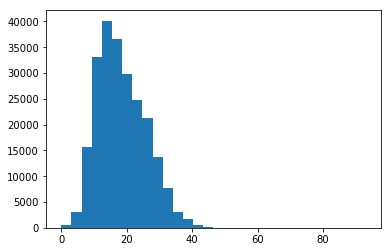

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([len(t) for t in token_dataset], bins=30)